<a href="https://colab.research.google.com/github/MohamedAziz15/ReggressorCost-Competition/blob/main/Cost_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/Train_Batch_1.csv',sep=",",encoding="UTF-8")

df.head()


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


# Data Preview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19440 non-null  object 
 1   Person Description             19440 non-null  object 
 2   Place Code                     19440 non-null  object 
 3   Customer Order                 19440 non-null  object 
 4   Additional Features in market  15140 non-null  object 
 5   Promotion Name                 16530 non-null  object 
 6   Store Kind                     16530 non-null  object 
 7   Store Sales                    19440 non-null  object 
 8   Store Cost                     19440 non-null  object 
 9   Product Weights Data in (KG)   19440 non-null  object 
 10  Is Recyclable?                 19440 non-null  object 
 11  Min. Yearly Income             19437 non-null  object 
 12  Store Area                     17483 non-null 

In [3]:
df.describe()

,Frozen Area,Cost
count,17506.000000,19416.000000
mean,492.810453,519.620778
std,145.874844,157.423741
min,227.800000,265.631700
25%,440.920000,364.269500
50%,470.270000,516.776300
75%,534.290000,662.222600
max,855.220000,783.192500


In [4]:
df.shape

(19440, 17)

In [7]:
# df.corr()

#### plotting Correlation

In [60]:
# plt.subplots(figsize = (24, 24))
# sns.heatmap(df.corr(), annot = True)

In [73]:
# correlationC=[]
# for column in df.columns :
#     for columnC in df.columns:
#         a = df[column].corr(df[columnC])
#         if a > 0.8 and (column != columnC) :
#             if a in correlationC:
#                 continue
#             else :
#                 correlationC.append(a)
#                 print (column +" column has high correlation with column "+ columnC)
#                 print(df[column].corr(df[columnC]))
#                 print("*******************************")

In [ ]:
df_copy = df[:]
df_copy

# Data Preprocessing and Cleaning

In [6]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}
df.rename(columns=new_columns, inplace=True)
df.keys()

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [47]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
19427    False
19428    False
19429    False
19430    False
19431    False
Length: 19432, dtype: bool

In [48]:
df.duplicated().sum()


0

In [49]:
df= df.drop_duplicates()
df.shape

(19432, 17)

In [7]:
df.isnull().any()

ID                               False
Person Description               False
Place Code                       False
Customer Order                   False
Additional Features in market     True
Promotion Name                    True
Store Kind                        True
Store Sales                      False
Store Cost                       False
Product Weights Data in (KG)     False
Is Recyclable?                   False
Min. Person Yearly Income         True
Store Area                        True
Grocery Area                      True
Frozen Area                       True
Meat Area                         True
Cost                              True
dtype: bool

In [8]:
df.isnull().sum()

ID                                  0
Person Description                  0
Place Code                          0
Customer Order                      0
Additional Features in market    4300
Promotion Name                   2910
Store Kind                       2910
Store Sales                         0
Store Cost                          0
Product Weights Data in (KG)        0
Is Recyclable?                      0
Min. Person Yearly Income           3
Store Area                       1957
Grocery Area                     1980
Frozen Area                      1934
Meat Area                        1948
Cost                               24
dtype: int64

In [9]:
df['Additional Features in market'].isnull().sum()

4300

In [10]:
df['Store Kind'].isnull().sum()

2910

#### Additional Features in market

In [11]:
df['Additional Features in market'].isnull().sum()

4300

In [12]:
df['Additional Features in market'].value_counts()

['Coffee Bar']                                                             2230
['Florist']                                                                1322
['Ready Food', 'Bar For Salad']                                            1037
['Bar For Salad', 'Ready Food']                                             933
['Florist', 'Bar For Salad', 'Coffee Bar', 'Ready Food']                    133
                                                                           ... 
['Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar', 'Video Store']      44
['Bar For Salad', 'Coffee Bar', 'Florist', 'Video Store', 'Ready Food']      42
['Ready Food', 'Video Store', 'Bar For Salad', 'Florist', 'Coffee Bar']      42
['Bar For Salad', 'Video Store', 'Coffee Bar', 'Ready Food', 'Florist']      38
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      34
Name: Additional Features in market, Length: 150, dtype: int64

In [13]:
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,'Additional Features in market']
    if type(item) == float :
      item = 'nan'
    # print(type(item))
    # print(item)
    if len(item) == 71:
      # print(item)
      # print('----------------------------------------')
      df.loc[i,'Additional Features in market'] = "['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']"
    elif  len(item) == 56:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']"
    elif  len(item) == 31:
      df.loc[i,'Additional Features in market'] = "['Ready Food', 'Bar For Salad']"
    elif  len(item) == 25:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Florist']"


In [14]:

df['Additional Features in market'].value_counts()


['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']    6870
['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']                   2571
['Coffee Bar']                                                             2230
['Ready Food', 'Bar For Salad']                                            1970
['Florist']                                                                1322
['Coffee Bar', 'Florist']                                                   177
Name: Additional Features in market, dtype: int64

In [15]:
# Decode ((Additional Features in market))
df['Additional Features in market'] = df['Additional Features in market'].replace(["['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']","['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']","['Coffee Bar']","['Ready Food', 'Bar For Salad']","['Florist']","['Coffee Bar', 'Florist']"]
                                                                                 , [1,2,3,4,5,6])
df['Additional Features in market'].value_counts()

1.0    6870
2.0    2571
3.0    2230
4.0    1970
5.0    1322
6.0     177
Name: Additional Features in market, dtype: int64

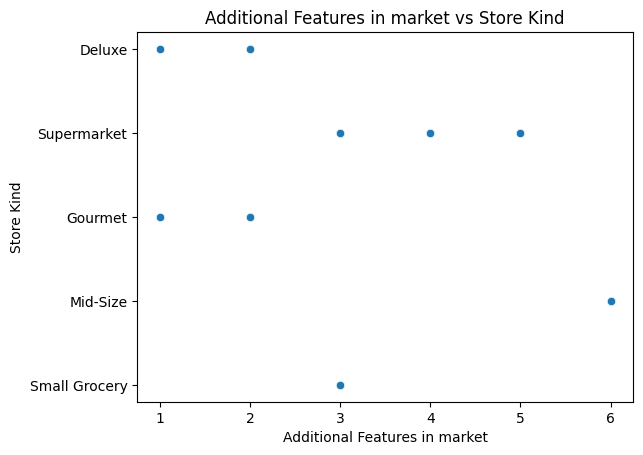

In [16]:
# Scatter plot using Seaborn
sns.scatterplot(x='Additional Features in market', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Additional Features in market')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

In [17]:
df['Additional Features in market'].isnull().sum()

4300

In [17]:
def fillNULL_AdditionalFeaturesinmarket():


"['Bar For Salad', 'Ready Food', 'Coffee Bar', 'Video Store', 'Florist']"

#### store Kind

<Axes: title={'center': 'Level Column Values'}, ylabel='Store Kind'>

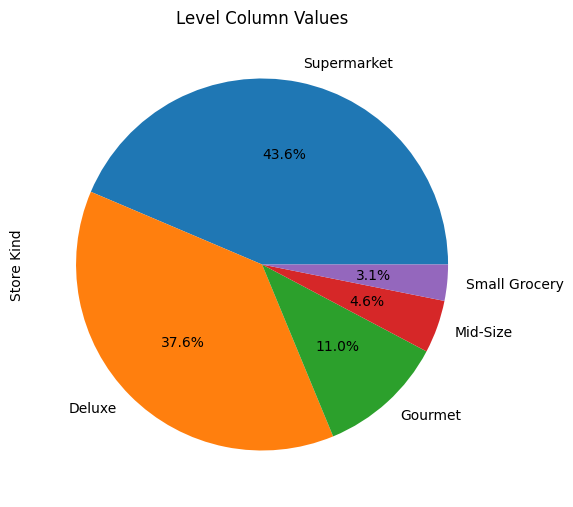

In [18]:
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["Store Kind"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [19]:
df["Store Kind"].value_counts()

Supermarket      7209
Deluxe           6220
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

In [20]:
# Decode ((Additional Features in market))
df["Store Kind"] = df["Store Kind"].replace(["Supermarket","Deluxe","Gourmet","Mid-Size","Small Grocery"]
                                                                                 , [1,2,3,4,5])
df["Store Kind"].value_counts()

1.0    7209
2.0    6220
3.0    1821
4.0     761
5.0     519
Name: Store Kind, dtype: int64

#### Promotion Name

In [ ]:
df.head()

In [21]:
df["Promotion Name"].value_counts()

Save Price                  676
Weekend Discount            660
Two Day Sale                633
Price Winners               579
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         459
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 407
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               323
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Promotion Name"] = le.fit_transform(df["Promotion Name"])


In [23]:
df["Promotion Name"].value_counts()

49    2910
34     676
47     660
44     633
26     579
40     568
33     541
20     519
39     508
28     497
13     478
24     476
12     463
37     459
29     457
17     418
45     407
3      400
14     394
18     379
23     369
5      360
35     351
8      332
1      327
22     323
7      301
36     298
0      287
27     285
48     283
32     279
16     270
31     261
30     258
42     257
43     250
21     247
2      235
38     228
4      202
9      148
46     139
15     134
25     127
19     123
6      114
41      87
11      76
10      67
Name: Promotion Name, dtype: int64

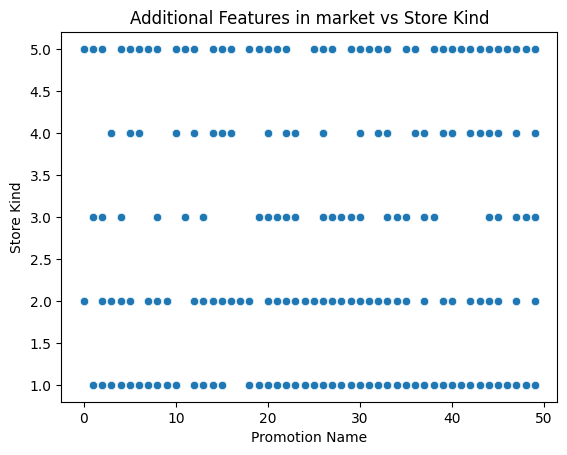

In [24]:
# Scatter plot using Seaborn
sns.scatterplot(x='Promotion Name', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Promotion Name')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

#### Is Recyclable?

In [29]:
df["Is Recyclable?"] = df["Is Recyclable?"].replace(["recyclable","non recyclable"],[1,0])
df["Is Recyclable?"].value_counts()

1    10848
0     8592
Name: Is Recyclable?, dtype: int64

[Text(0.5, 1.0, 'Is Recyclable?')]

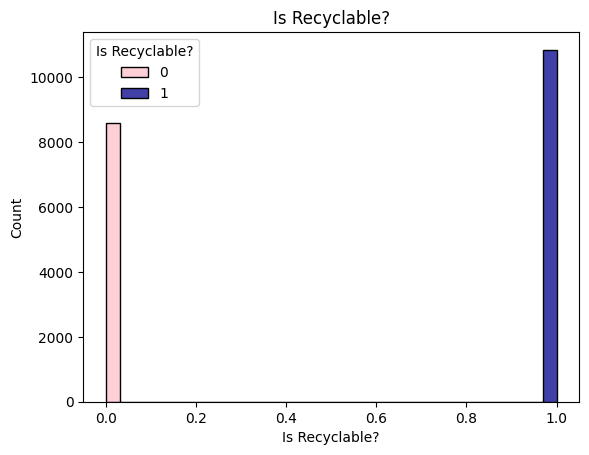

In [38]:
# plt.subplots(figsize=(8, 4))
sns.histplot(data=df, x=df["Is Recyclable?"], hue=df["Is Recyclable?"], multiple="dodge",palette=["pink","darkblue"]).set(title='Is Recyclable?')

#### AREA


In [51]:
df['Store Area'].isnull().sum()

1956

In [ ]:
# # df["Grocery Area"][2]
# # df["Grocery Area"].isnull().sum()
# for i in range(df.shape[0]):
#     item = df.loc[i,"Grocery Area"]
#     if type(item) == float :
#       df.loc[i,'Grocery Area']  = 0
#       # print("Store Area ",item)
#     #   item = 'nan'
#     print(type(item))
#     print(item)
#     print('////////////////////')

In [86]:
df["Grocery Area"].isnull().sum()

0

In [ ]:
def fillStoreArea():
  for i in range(df.shape[0]):
    item = df.loc[i,"Grocery Area"]
    if type(item) == float :
      # --> # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
      #GroceryArea	+ FrozenArea + MeatArea
      df.loc[i,"Grocery Area"]  = float(df["Store Area"][i]) - float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
      # print("Store Area ",item)
  print ("Any null values Here ? ",df['Store Area'].isnull().sum())

fillStoreArea()

In [77]:
df["Frozen Area"][2]
df["Frozen Area"].isnull().sum()

1933

In [82]:
df["Meat Area"][2]
df["Meat Area"].isnull().sum()

1946

In [75]:
df['Store Area'][2]

'2192.32'

In [88]:
def fillStoreArea():
  for i in range(df.shape[0]):
    item = df.loc[i,'Store Area']
    if type(item) == float :
       Grocery_item = df.loc[i,"Grocery Area"]
       Frozen_item  =  df.loc[i,"Frozen Area"]
       Meat_item    = df.loc[i,"Meat Area"]
       if type(Grocery_item) == float &  type(Frozen_item) == float &  type(Meat_item) == float :
          df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
          print('Store Area'  ,df.loc[i,'Store Area'])
          print('Grocery Area',df.loc[i,'Frozen Area'])
          print('Frozen Area' ,df.loc[i,'Frozen Area'])
          print('Meat Area'   ,df.loc[i,'Meat Area'])

      # --> # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
      #GroceryArea	+ FrozenArea + MeatArea
      # df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
      # print("Store Area ",item)
  print ("Any null values Here ? ",df['Store Area'].isnull().sum())

fillStoreAre()


Any null values Here ?  364


In [50]:
df.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...",1.0,7,2.0,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",1,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,5,1.0,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",0,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",5.0,38,1.0,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",1,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",3.0,36,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",1,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...",1.0,31,2.0,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",0,50K+,2862.3,1872.19,593.93,395.95,519.7574


<ipython-input-39-f6fe4c71ae8f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


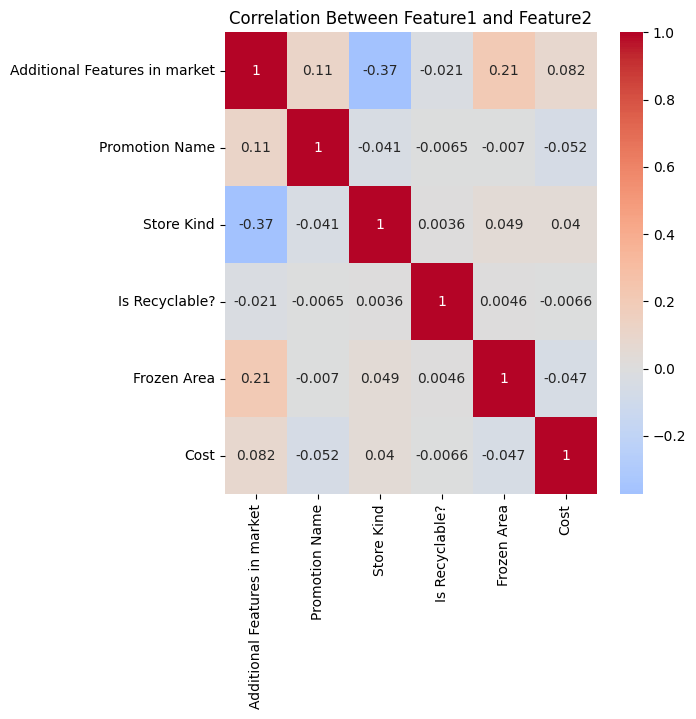

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Feature1 and Feature2')
plt.show()


#### Person Description

In [115]:
s = df["Person Description"][0].split(' ')
s

['Single',
 'Female',
 'with',
 'four',
 'children,',
 'education:',
 'bachelors',
 'degree',
 'working',
 'as',
 'professional']

In [ ]:
df.head()

#### **bold text**

In [108]:
df.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","[Video Store, Ready Food, Florist, Coffee Bar,...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","[Video Store, Ready Food, Florist, Coffee Bar,...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


0        False
1        False
2        False
3        False
4        False
         ...  
19435     True
19436     True
19437     True
19438     True
19439     True
Length: 19440, dtype: bool

--> *no dublicates Found*


In [ ]:
df= df.drop ('CustomerID',axis=1)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df.describe()

,Frozen Area,Cost
count,17506.000000,19416.000000
mean,492.810453,519.620778
std,145.874844,157.423741
min,227.800000,265.631700
25%,440.920000,364.269500
50%,470.270000,516.776300
75%,534.290000,662.222600
max,855.220000,783.192500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19440 non-null  object 
 1   Person Description             19440 non-null  object 
 2   Place Code                     19440 non-null  object 
 3   Customer Order                 19440 non-null  object 
 4   Additional Features in market  15140 non-null  object 
 5   Promotion Name                 16530 non-null  object 
 6   Store Kind                     16530 non-null  object 
 7   Store Sales                    19440 non-null  object 
 8   Store Cost                     19440 non-null  object 
 9   Product Weights Data in (KG)   19440 non-null  object 
 10  Is Recyclable?                 19440 non-null  object 
 11  Min. Yearly Income             19437 non-null  object 
 12  Store Area                     17483 non-null 

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
df1.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
list3 = df2.keys()
list3 = list3.to_list()
list1 = df.keys().to_list()
print(list1)
print(list2)
print(list3)

['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Product Weights Data in (KG)', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']


In [ ]:
df1.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df.rename(columns=new_columns, inplace=True)
df.keys()

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df1.rename(columns=new_columns, inplace=True)
df1.keys()

list2=df1.keys().to_list()

In [ ]:
new_columns_df2 = {'Unnamed: 0' : 'ID', 'Person%20Description' : 'Person Description', 'Place%20Code':'Place Code',
       'Customer%20Order':'Customer Order', 'Additional%20Features%20in%20market':'Additional Features in market',
       'Promotion%20Name':'Promotion Name', 'Store%20Kind':'Store Kind', 'Store%20Sales':'Store Sales', 'Store%20Cost':'Store Cost',
       'Gross%20Weight':'Gross Weight', 'Net%20Weight':'Net Weight', 'Is%20Recyclable?':'Is Recyclable?',
       'Yearly%20Income':'Min. Person Yearly Income', 'Store%20Area':'Store Area', 'Grocery%20Area':'Grocery Area', 'Frozen%20Area':'Frozen Area',
       'Meat%20Area':'Meat Area', 'Cost':'Cost'}
df2.rename(columns=new_columns_df2, inplace=True)
df2.keys()

# #df1
#        'Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
#        'Additional Features in market', 'Promotion Name', 'Store Kind',
#        'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
#        'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
#        'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income',
       'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
common_columns = list(set(df.columns) & set(df1.columns) & set(df2.columns))
batch1_common = df[common_columns]
batch2_common = df1[common_columns]
batch3_common = df2[common_columns]
concatenated_df = pd.concat([batch1_common, batch2_common, batch3_common], ignore_index=True)


In [ ]:
common_key = 'ID'  # Replace with the actual key column name
merged_df = df.merge(df1, on=common_key, how='outer').merge(df2, on=common_key, how='outer')


In [ ]:
df2['Weights%20Data'][0]

"{'Gross Weight': 23.2575, 'Net Weight': 20.3503, 'Package Weight': 2.9072}"

In [122]:
new_value = ['Video Store', 'Ready Food', 'Florist', 'Coffee Bar', 'Bar For Salad']
my_array = np.array(new_value)

for i in range(df.shape[0]):
  if df['Store Kind'][i] == 'Deluxe' :
    df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']
    str(df['Additional Features in market'][i])

df['Additional Features in market'].value_counts()


<ipython-input-122-cf0da11bb305>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']


[Florist, Bar For Salad, Ready Food, Video Store, Coffee Bar]              6220
['Coffee Bar']                                                             2230
['Florist']                                                                1322
['Ready Food', 'Bar For Salad']                                            1037
['Bar For Salad', 'Ready Food']                                             933
                                                                           ... 
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Ready Food', 'Florist', 'Video Store', 'Bar For Salad', 'Coffee Bar']      10
['Bar For Salad', 'Florist', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Bar For Salad', 'Coffee Bar', 'Video Store', 'Ready Food', 'Florist']       9
['Bar For Salad', 'Video Store', 'Florist', 'Coffee Bar', 'Ready Food']       9
Name: Additional Features in market, Length: 151, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df1 = pd.read_csv('/content/Train_Batch_2.csv',sep=",",encoding="UTF-8")

df1.head()


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
df1.describe()

,Gross Weight,Net Weight,Store Area,Grocery Area,Meat Area,Cost
count,11014.000000,11018.000000,11663.000000,11658.000000,11688.000000,12953.000000
mean,20.032870,17.149701,2598.170053,1773.400262,329.709677,518.565349
std,6.700986,6.804349,524.954453,365.488893,96.819335,155.198098
min,8.721600,4.433500,1882.710000,1233.080000,149.900000,265.631700
25%,14.045325,11.207200,2189.080000,1506.990000,293.577500,364.269500
50%,19.768900,16.861700,2572.860000,1734.500000,313.550000,515.259600
75%,25.728600,23.257500,2864.085000,2052.540000,394.272500,660.235200
max,31.833700,30.234700,3692.840000,2822.650000,570.740000,783.192500


In [ ]:
df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


In [ ]:
df['Person Description'][2]

'Married Male with two children, education: high school degree working as skilled manual'

In [ ]:
df['Promotion Name'][2]

'Shelf Emptiers'

In [ ]:
df2.describe()

,Gross%20Weight,Net%20Weight,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
count,5491.000000,5511.000000,6151.000000,6138.000000,6147.000000,6133.000000,6462.000000
mean,20.153632,17.152036,2602.487761,1779.720722,493.928194,328.839786,519.355948
std,6.683436,6.744036,532.761319,367.559597,147.995833,97.616394,158.578508
min,8.721600,4.491600,1882.710000,1233.240000,227.800000,149.900000,265.631700
25%,14.223400,11.294400,2190.910000,1508.000000,440.920000,293.120000,364.164900
50%,19.914200,16.861700,2572.860000,1734.500000,470.270000,313.550000,516.776300
75%,26.019300,22.966800,2863.465000,2052.550000,534.290000,356.190000,662.222600
max,31.833700,30.234700,7857.550000,2822.610000,1783.640000,570.730000,783.192500


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df2 = pd.read_csv('/content/Train_Batch_3.csv',sep=",",encoding="UTF-8")

df2.head()


,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411
2,mc_ID_2,"Married Male with three children, education: h...",T02ma_WA,"Paper Products from Household department, Orde...","['Coffee Bar', 'Bar For Salad', 'Ready Food', ...",Promo Big,Deluxe,4.98 Millions,2.4402 Millions,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,30K+,3140.99,2055.29,654.13,436.09,267.3576
3,mc_ID_3,"Married Female with five children, education: ...",H11go_ZA,"Snack Foods from Snack Foods department, Order...","['Video Store', 'Coffee Bar', 'Ready Food', 'F...",Price Destroyers,NaN,5.24 Millions,2.0436 Millions,23.6936,NaN,"{'Gross Weight': 23.6936, 'Net Weight': 20.641...",no,10K+,2841.35,2038.11,481.98,322.22,777.2826
4,mc_ID_4,"Married Female with No children, education: pa...",O09ba_VE,"Canned Soup from Canned Foods department, Orde...","['Ready Food', 'Bar For Salad']",Save Price,Supermarket,8.84 Millions,3.4476 Millions,13.6056,10.6839,"{'Gross Weight': 13.6056, 'Net Weight': 10.683...",no,110K+,3236.33,2448.37,472.27,313.87,406.4756


In [ ]:
df2['Additional%20Features%20in%20market'][0]

"['Coffee Bar', 'Florist', 'Ready Food', 'Bar For Salad']"

In [ ]:
df1['Additional Features in market'][0]

"['Video Store', 'Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar']"

In [ ]:
df1.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
import pandas as pd

# Concatenate the DataFrames vertically (along rows)
concatenated_df = pd.concat([df1, df2, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('/content/concatenated.csv', index=False)



In [ ]:
concatenated_df.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574
5,mc_ID_5,"Single Male with four children, education: hig...",S03le_WA,"Candles from Household department, Ordered Bra...",['Coffee Bar'],Weekend Discount,Supermarket,5.22 Millions,1.6182 Millions,"{'Gross Weight': 15.4081, 'Net Weight': 13.954...",recyclable,30K+,1970.17,1236.07,440.92,293.95,364.1649
6,mc_ID_6,"Married Female with five children, education: ...",S04ne_WA,Pain Relievers from Health and Hygiene departm...,NaN,Price Winners,NaN,8.49 Millions,3.7356 Millions,"{'Gross Weight': 17.1524, 'Net Weight': 14.245...",recyclable,130K+,2814.82,2049.72,457.36,304.91,599.3580
7,mc_ID_7,"Married Male with four children, education: pa...",A17co_GU,"Vegetables from Frozen Foods department, Order...",NaN,Shelf Clearing Days,Supermarket,6.57 Millions,2.6937 Millions,"{'Gross Weight': 17.2978, 'Net Weight': 14.376...",recyclable,10K+,NaN,1623.48,341.05,NaN,288.8006
8,mc_ID_8,"Married Male with five children, education: hi...",O09ba_VE,Beer and Wine from Alcoholic Beverages departm...,"['Bar For Salad', 'Ready Food']",Big Time Discounts,Supermarket,2.43 Millions,1.1907 Millions,"{'Gross Weight': 25.1472, 'Net Weight': 23.548...",recyclable,30K+,3236.46,2449.91,472.27,313.55,501.9754
9,mc_ID_9,"Single Male with one child, education: high sc...",S01em_OR,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Video Store', 'Ready Food',...",Lottery Cash Registerion,Deluxe,4.02 Millions,1.2864 Millions,"{'Gross Weight': 14.972, 'Net Weight': 12.0648...",non recyclable,30K+,2572.49,1734.5,503.07,333.55,290.7357


In [ ]:
df1.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884


In [ ]:
df2.head(2)

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411


In [ ]:
concatenated_df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Promotion Name'].value_counts()

Save Price                  676
Weekend Discount            660
Two Day Sale                633
Price Winners               579
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         459
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 407
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               323
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [ ]:
df['Store Kind'].value_counts()

Supermarket      7209
Deluxe           6220
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

In [ ]:
df['Store Sales'].value_counts()

5.04 Millions     99
4.8 Millions      91
5.4 Millions      90
8.52 Millions     89
7.95 Millions     86
                  ..
18.8 Millions      1
1.61 Millions      1
3.21 Millions      1
16.35 Millions     1
19.05 Millions     1
Name: Store Sales, Length: 945, dtype: int64

In [ ]:
df['Gross Weight'][0]

KeyError: ignored

In [ ]:
df['Net Weight'].value_counts()

KeyError: ignored

In [ ]:
df['Package Weight'].value_counts

KeyError: ignored

In [ ]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Review

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# getting the dataset's rows and columns by invoking the shape() function
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Feature Engineering

> Feature Polynomial

> One-hot encoding (Gender)




<ipython-input-7-1ce0e26227fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

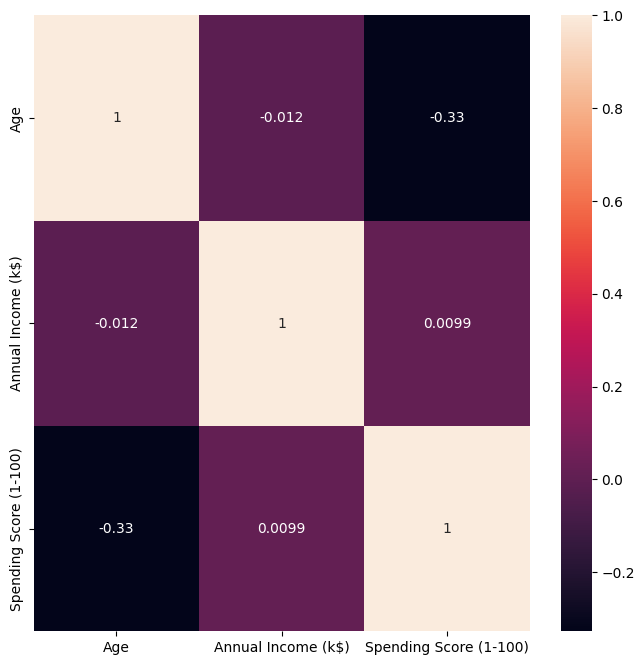

In [ ]:
plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
df["Gender"] = df["Gender"].replace(["Female","Male"],[0,1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


scaler

Normalization

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test = train_test_split(df,test_size=0.2,random_state=42)


In [ ]:
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26
24,0,54,28,14
122,0,40,69,58


In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.35      , 44.65      , 26.55      , 20.65      ],
       [ 0.41269841, 44.28571429, 56.42857143, 49.        ],
       [ 0.47058824, 32.94117647, 87.82352941, 82.97058824],
       [ 0.52173913, 39.65217391, 91.2173913 , 16.17391304],
       [ 0.4       , 25.55      , 26.35      , 79.55      ]])

In [ ]:
# plt.scatter(x_train['Gender'],x_train['Age'],x_train['Annual Income (k$)'],x_train['Spending Score (1-100)'], s =50, c='b')
# plt.scatter( 0.41836735, 44.64285714, 58.36734694, 34.8877551, s=200, c='g', marker='s')
# plt.scatter(  0.4516129 , 29.85483871, 64.14516129, 78.46774194, s=200, c='r', marker='s')
# plt.show()

In [ ]:
y_=kmeans.labels_
y_

array([1, 2, 0, 0, 1, 2, 4, 4, 2, 1, 1, 2, 4, 1, 1, 1, 3, 1, 3, 1, 2, 1,
       4, 0, 4, 1, 0, 2, 1, 3, 1, 2, 3, 4, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2,
       2, 1, 2, 0, 3, 1, 0, 2, 1, 4, 4, 3, 2, 0, 4, 1, 0, 0, 1, 2, 1, 3,
       0, 1, 1, 1, 3, 0, 3, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 3, 4, 4, 3, 2,
       1, 4, 3, 1, 1, 3, 4, 3, 4, 1, 1, 2, 3, 3, 2, 1, 1, 0, 4, 1, 1, 1,
       3, 2, 1, 0, 4, 1, 2, 2, 4, 1, 2, 3, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1,
       4, 1, 3, 3, 2, 4, 2, 2, 4, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 0, 1, 2, 1], dtype=int32)

In [ ]:
kmeans.predict(x_test)

array([1, 4, 0, 3, 3, 1, 1, 3, 3, 4, 1, 3, 2, 1, 3, 2, 1, 3, 1, 1, 3, 0,
       3, 1, 1, 1, 1, 1, 2, 1, 4, 0, 1, 1, 3, 1, 2, 2, 3, 1], dtype=int32)

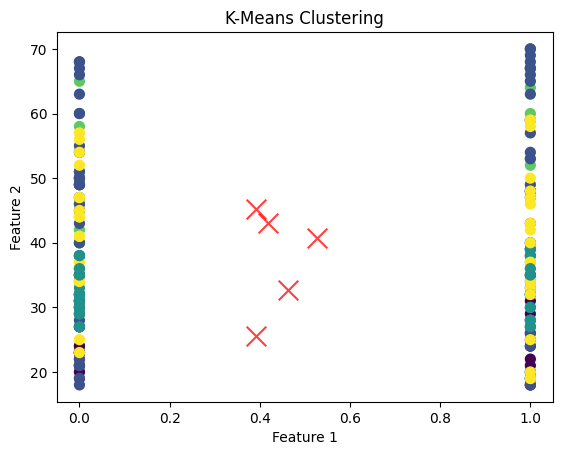

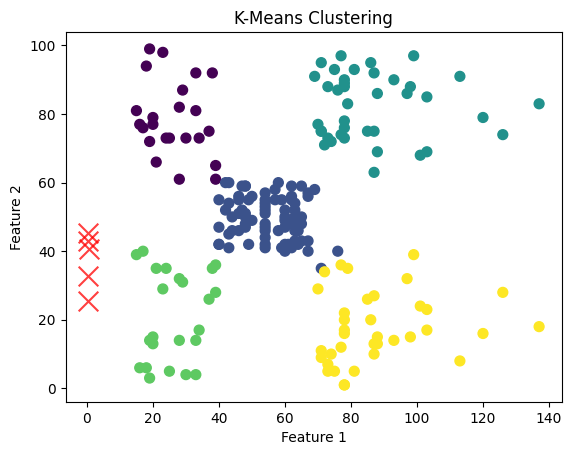

In [ ]:
# Apply K-Means clustering
kmeans1 = KMeans(n_clusters=5,n_init = 10 ,max_iter=300)
kmeans1.fit(df)
y_kmeans = kmeans1.predict(df)

# Plot the data and cluster centers
plt.scatter(df['Gender'],df['Age'], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Plot the data and cluster centers
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()



In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
